# CO2 Emission Africa Project

## Context
This project involves designing a complete data pipeline that ingests, cleans, stores, and analyzes CO₂ emissions data from various African countries over time. You will use the provided dataset co2 Emission Africa.csv to extract meaningful insights about emission trends and patterns, touching on each stage of the data life cycle.


## Objectives 
- Apply the full data life cycle
- Develop data cleaning and transformation scripts.
- Store and model data using a relational database.
- Perform analysis to uncover trends and patterns in emissions data.
- Reflect on data ethics, quality, and transparency.


## Data Ingestion

In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for data transformation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
# read the data
df = pd.read_csv('co2 Emission Africa.csv')
# returns the first 5 rows
df.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52


#### Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. 

In [7]:
# Check the shape of the dataset
df.shape

(1134, 20)

#### Observations:
There are 1134 rows(excluding the header row) and there are 20 columns present in the data

In [8]:
# Use to generate summary statistics of the dataframe
df.describe()

,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
count,1134.000000,1.134000e+03,1107.000000,1086.000000,1.134000e+03,1122.000000,1134.000000,1134.000000,1122.000000,1122.000000,1134.000000,1072.000000,330.000000,1134.000000,1122.000000,1122.000000,1122.000000
mean,2010.000000,1.975236e+07,2220.015953,5106.329926,5.564746e+05,4.913164,41.243289,20.818968,0.434394,2.548387,20.424577,1.114981,4.567152,19.765159,9.272451,0.753788,1.454635
std,6.057972,2.877802e+07,2971.760298,5989.405811,5.983822e+05,10.844025,89.057762,62.186060,1.190362,7.805355,66.859781,2.919895,7.963444,60.348813,38.468534,1.895787,4.303603
min,2000.000000,8.113100e+04,110.460000,420.270000,4.520000e+02,0.010000,-10.410000,0.050000,0.000000,0.000000,-24.950000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000
25%,2005.000000,2.384106e+06,526.280000,1468.582500,5.678500e+04,0.360000,2.772500,0.810000,0.000000,0.060000,0.105000,0.000000,0.322500,0.782500,0.090000,0.050000,0.040000
50%,2010.000000,1.078683e+07,1009.490000,2544.630000,3.322315e+05,1.065000,14.110000,2.715000,0.030000,0.320000,6.420000,0.080000,1.800000,2.560000,0.305000,0.150000,0.120000
75%,2015.000000,2.359457e+07,2538.470000,6072.067500,9.237680e+05,2.937500,39.772500,7.777500,0.190000,1.460000,17.350000,0.632500,4.762500,7.207500,2.145000,0.640000,0.530000
max,2020.000000,2.083274e+08,19849.720000,33261.870000,2.381741e+06,59.450000,606.390000,448.300000,8.680000,61.100000,601.260000,22.820000,52.490000,443.390000,311.550000,14.790000,33.970000


In [6]:
# Use to print a summary of the dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1134 non-null   object 
 1   Sub-Region                              1134 non-null   object 
 2   Code                                    1134 non-null   object 
 3   Year                                    1134 non-null   int64  
 4   Population                              1134 non-null   int64  
 5   GDP PER CAPITA (USD)                    1107 non-null   float64
 6   GDP PER CAPITA PPP (USD)                1086 non-null   float64
 7   Area (Km2)                              1134 non-null   int64  
 8   Transportation (Mt)                     1122 non-null   float64
 9   Total CO2 Emission including LUCF (Mt)  1134 non-null   float64
 10  Total CO2 Emission excluding LUCF (Mt)  1134 non-null   floa

#### Observations:
There are 3 datatypes in the different columns of the dataset. We have 14 float, 3 int(integers) and 3 object.

## Data Cleaning 

In [9]:
#Checking for missing values
df.isnull().sum()

Country                                     0
Sub-Region                                  0
Code                                        0
Year                                        0
Population                                  0
GDP PER CAPITA (USD)                       27
GDP PER CAPITA PPP (USD)                   48
Area (Km2)                                  0
Transportation (Mt)                        12
Total CO2 Emission including LUCF (Mt)      0
Total CO2 Emission excluding LUCF (Mt)      0
Other Fuel Combustion (Mt)                 12
Manufacturing/Construction (Mt)            12
Land-Use Change and Forestry (Mt)           0
Industrial Processes (Mt)                  62
Fugitive Emissions (Mt)                   804
Energy (Mt)                                 0
Electricity/Heat (Mt)                      12
Bunker Fuels (Mt)                          12
Building (Mt)                              12
dtype: int64

In [10]:
# Calculating percentage of missing values per column
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent.sort_values(ascending=False))

Fugitive Emissions (Mt)                   70.899471
Industrial Processes (Mt)                  5.467372
GDP PER CAPITA PPP (USD)                   4.232804
GDP PER CAPITA (USD)                       2.380952
Building (Mt)                              1.058201
Manufacturing/Construction (Mt)            1.058201
Bunker Fuels (Mt)                          1.058201
Electricity/Heat (Mt)                      1.058201
Transportation (Mt)                        1.058201
Other Fuel Combustion (Mt)                 1.058201
Energy (Mt)                                0.000000
Land-Use Change and Forestry (Mt)          0.000000
Country                                    0.000000
Sub-Region                                 0.000000
Total CO2 Emission including LUCF (Mt)     0.000000
Area (Km2)                                 0.000000
Population                                 0.000000
Year                                       0.000000
Code                                       0.000000
Total CO2 Em

#### Observations: 
There are 10 columns with missing values. 9 of the columns have a percentage of missing values that is lower than 10% so we will fill the numerical values with median and we shall drop the Fugitive Emissions column because it has a missing values percentage of 70%

In [11]:
 # Drop columns with more than 10% missing values
df = df.dropna(thresh=len(df) * 0.1, axis=1) 

# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True) 

# Assign cleaned dataset
df_cleaned = df.copy() 

In [12]:
# Save the cleaned dataset to a CSV file
df_cleaned.to_csv("co2_emissions_africa_cleaned.csv", index=False)

In [13]:
# Checking to see if the data is cleaned
df.isnull().sum()

Country                                   0
Sub-Region                                0
Code                                      0
Year                                      0
Population                                0
GDP PER CAPITA (USD)                      0
GDP PER CAPITA PPP (USD)                  0
Area (Km2)                                0
Transportation (Mt)                       0
Total CO2 Emission including LUCF (Mt)    0
Total CO2 Emission excluding LUCF (Mt)    0
Other Fuel Combustion (Mt)                0
Manufacturing/Construction (Mt)           0
Land-Use Change and Forestry (Mt)         0
Industrial Processes (Mt)                 0
Fugitive Emissions (Mt)                   0
Energy (Mt)                               0
Electricity/Heat (Mt)                     0
Bunker Fuels (Mt)                         0
Building (Mt)                             0
dtype: int64

## Data Transformation

In [14]:
# Convert Year to datetime 
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [15]:
# Convert categorical columns to 'category' type
df[['Country', 'Sub-Region', 'Code']] = df[['Country', 'Sub-Region', 'Code']].astype('category')

In [16]:
# Ensure all measurement columns are float64 for consistency
measure_cols = [col for col in df.columns if '(Mt)' in col]
df[measure_cols] = df[measure_cols].astype('float64')

In [18]:
#Allows us to use CO₂ emissions per capita calculated from the "including LUCF" column
df['Emissions Per Capita'] = df['Total CO2 Emission including LUCF (Mt)'] / df['Population']

In [17]:
# Select ONLY numerical columns that need scaling (exclude year/categorical)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Year', 'Code']]  # Exclude non-feature numbers

# Create a copy of the original data
df_scaled = df.copy()

# Apply MinMaxScaler (0 to 1)
scaler = MinMaxScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Show results
df_scaled.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000-01-01,0.147390,0.084599,0.246337,1.0,0.283311,0.147584,0.178472,0.0,0.100818,0.040753,0.166082,0.281006,0.171900,0.093629,0.132522,0.274654
1,Algeria,Northern Africa,DZA,2001-01-01,0.149438,0.083292,0.256394,1.0,0.286507,0.140483,0.175349,0.0,0.102291,0.035994,0.165206,0.225948,0.168787,0.096935,0.133874,0.280542
2,Algeria,Northern Africa,DZA,2002-01-01,0.151472,0.085330,0.272032,1.0,0.325538,0.146579,0.183714,0.0,0.108347,0.035994,0.177914,0.194323,0.176614,0.103611,0.146721,0.291139
3,Algeria,Northern Africa,DZA,2003-01-01,0.153543,0.101655,0.294377,1.0,0.365915,0.155950,0.196631,0.0,0.114730,0.035994,0.176599,0.231854,0.189719,0.104413,0.127789,0.314395
4,Algeria,Northern Africa,DZA,2004-01-01,0.155725,0.127378,0.311589,1.0,0.370458,0.158074,0.199532,0.0,0.132406,0.035994,0.214724,0.213755,0.190711,0.101910,0.148073,0.339123


#### Observations
To get the dataset ready for visualization and analysis, we used MinMax normalization (scaled to range from 0 to 1) on the numeric columns. 

We did not include columns such as 'Year' and 'Code' as the purpose of those is as identifiers or categorical reference, and to normalize them would diminish that threshold.

This normalizing allows us to establish a level playing ground with features such as  CO₂ emissions,GDP per capita and population so that comparisons and plots are more interpretable.

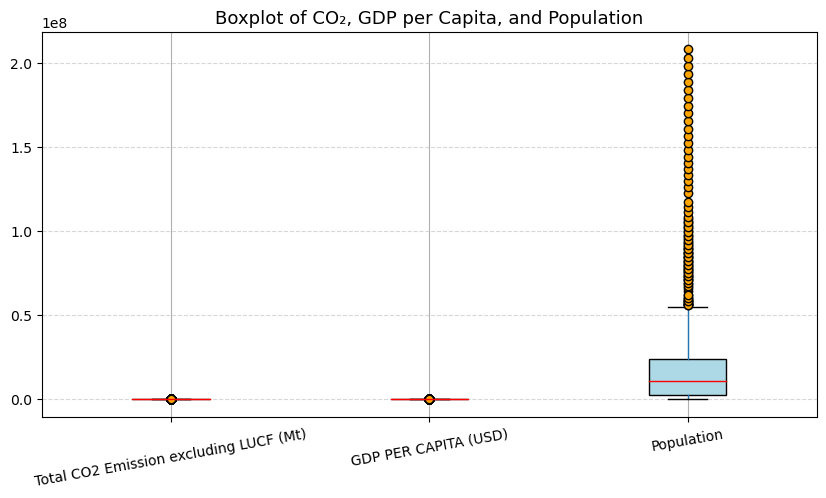

In [19]:
plt.figure(figsize=(10, 5))

df[["Total CO2 Emission excluding LUCF (Mt)", "GDP PER CAPITA (USD)", "Population"]].boxplot(
    patch_artist=True,  # Enables box coloring
    boxprops=dict(facecolor='lightblue'),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6)
)

plt.title("Boxplot of CO₂, GDP per Capita, and Population", fontsize=13)
plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


#### Observations:
- Population has a wide range and extreme outliers — some countries are very populous compared to the rest.
- GDP per capita and CO₂ emissions are highly skewed, with many countries clustered near the bottom.
- The outliers in GDP and emissions are likely wealthier, high-emitting nations.
- This shows that population alone doesn’t explain emissions — smaller countries may emit more per person.

## Data Visualization

#### Which countries emit the most Co2 per person?

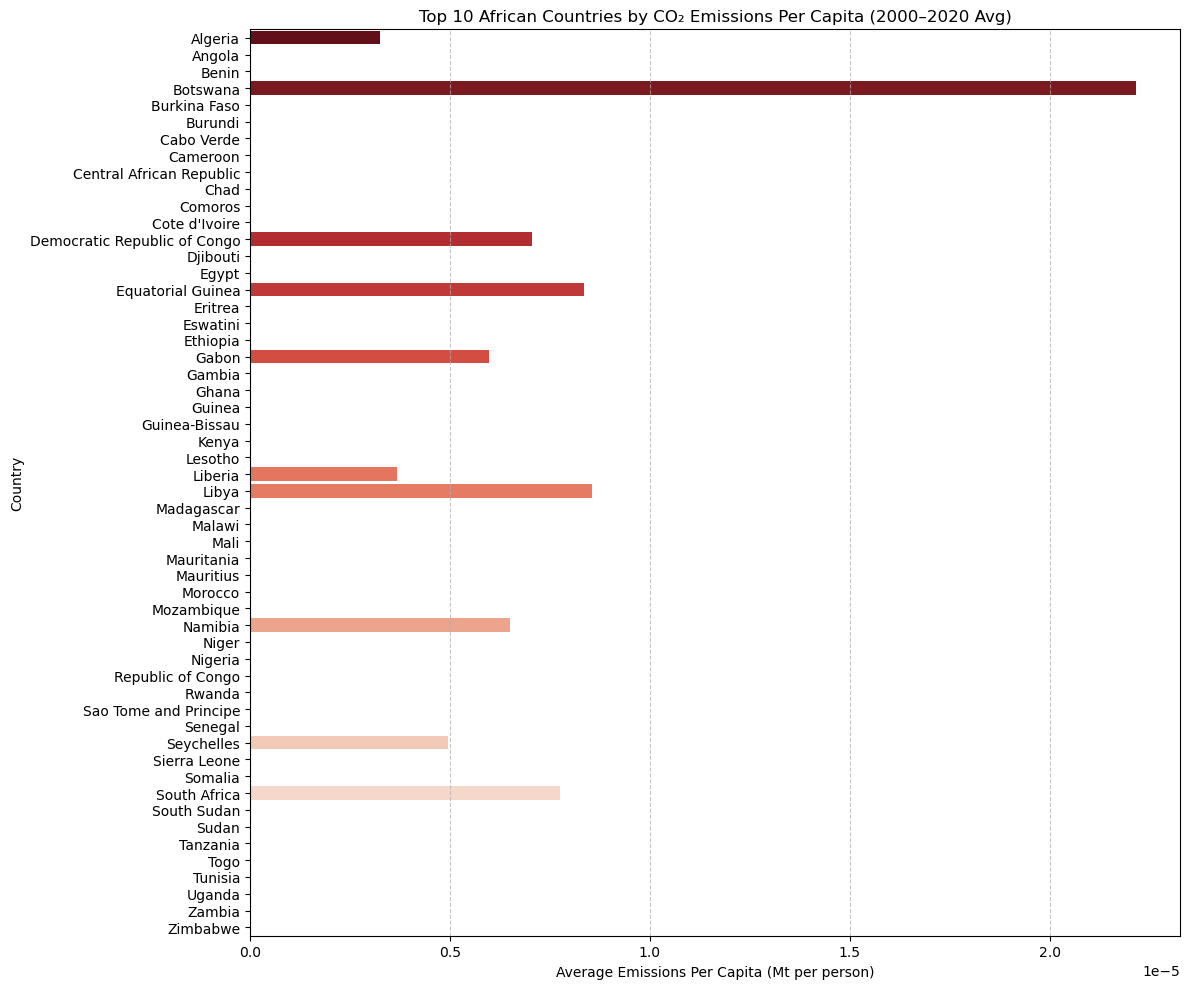

In [48]:
# Step 1: Group by country and get average emissions per capita
top_emitters = df.groupby('Country')['Emissions Per Capita'].mean().sort_values(ascending=False).head(10)

# Step 2: Plot as barplot
plt.figure(figsize=(12, 10))
sns.barplot(x=avg_emissions.values, y=avg_emissions.index, palette='Reds_r')

plt.title('Top 10 African Countries by CO₂ Emissions Per Capita (2000–2020 Avg)')
plt.xlabel('Average Emissions Per Capita (Mt per person)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We calculated average per capita CO2 emissions by country over the years, and visualized the top 10 emitters. This helped us to discover which countries have the greatest per person impact on the climate, regardless of overall population. We analyzed the average CO₂ emissions per capita across African countries from 2000 to 2020. The results show that while most countries have minimal emissions per person, a few — notably Botswana, Libya, Equatorial Guinea, and South Africa — emit significantly more.  This highlights the need for targeted policies focused on cleaner energy use in high-emission countries, while supporting low-emission countries in sustainable development.


#### How have total CO₂ emissions across Africa changed over time?

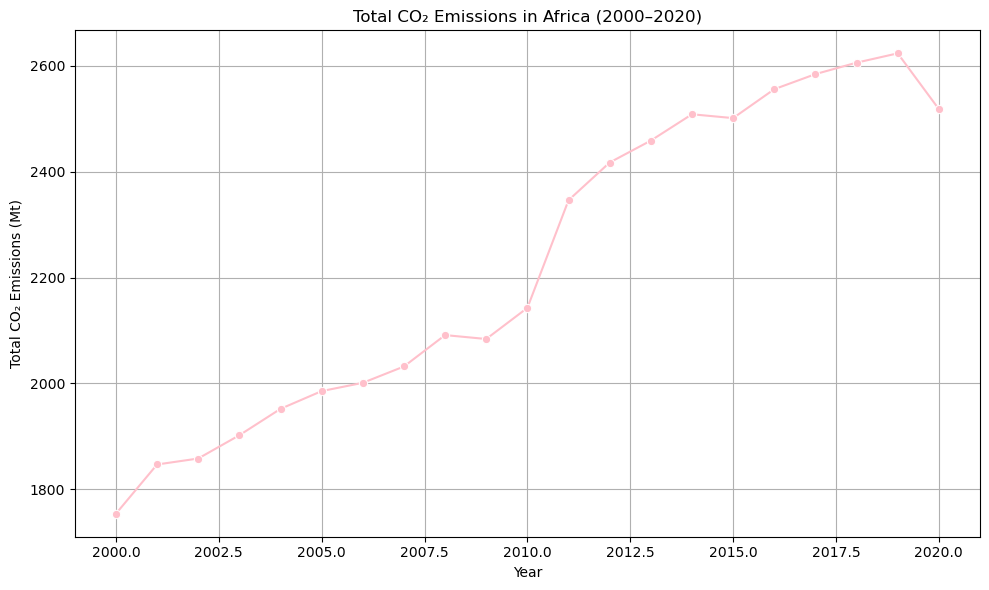

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Group by year and sum emissions
total_by_year = df.groupby('Year')['Total CO2 Emission including LUCF (Mt)'].sum().reset_index()

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_by_year, x='Year', y='Total CO2 Emission including LUCF (Mt)', marker='o', color='pink')

plt.title('Total CO₂ Emissions in Africa (2000–2020)')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions (Mt)')
plt.grid(True)
plt.tight_layout()
plt.show()


The graph shows that emissions rose consistently over the two decades, with a sharp spike around 2010–2012, and a slight decline in 2020. This indicates a growing carbon footprint, likely due to population growth, industrialization, and increased energy use. The 2020 drop may be linked to global economic slowdowns caused by the COVID-19 pandemic.

#### Do richer countries emit more CO2 per person?

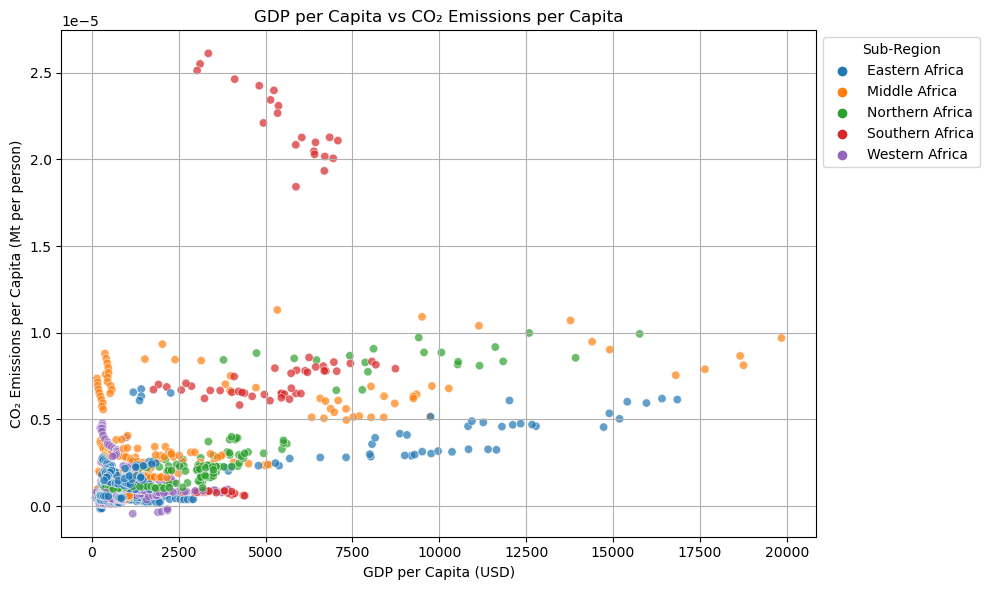

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='GDP PER CAPITA (USD)',
    y='Emissions Per Capita',
    hue='Sub-Region',  # Optional: color by region to show clusters
    alpha=0.7
)

plt.title('GDP per Capita vs CO₂ Emissions per Capita')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('CO₂ Emissions per Capita (Mt per person)')
plt.grid(True)
plt.legend(title='Sub-Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


The scatterplot reveals that while some wealthier countries do have higher emissions per capita (especially in Southern Africa), there is no consistent upward trend across all countries. This suggests that while economic development may influence emissions, other factors — such as energy source or industrial activity also play significant roles in determining a country's carbon footprint.

#### Which sectors have contributed the most to CO₂ emissions in Africa over time?

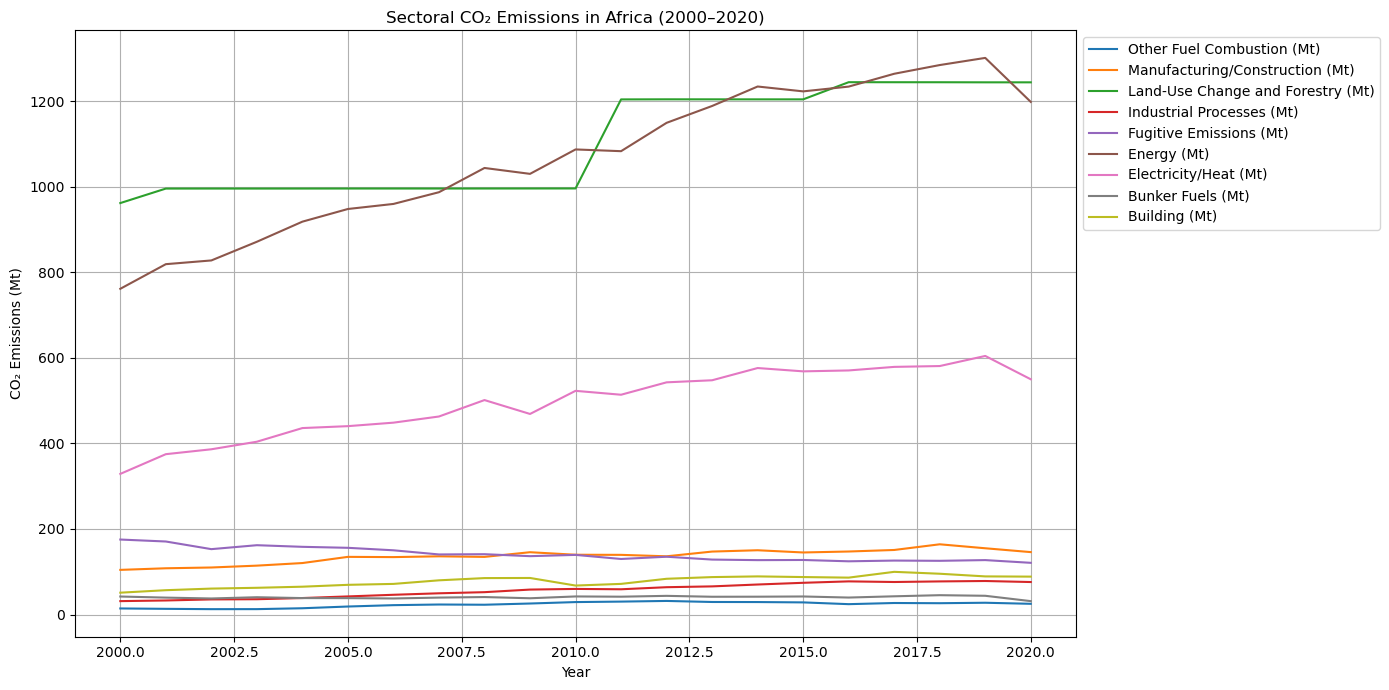

In [41]:
sectors = [
    'Other Fuel Combustion (Mt)', 'Manufacturing/Construction (Mt)',
    'Land-Use Change and Forestry (Mt)', 'Industrial Processes (Mt)',
    'Fugitive Emissions (Mt)', 'Energy (Mt)', 'Electricity/Heat (Mt)',
    'Bunker Fuels (Mt)', 'Building (Mt)'
]

plt.figure(figsize=(14, 7))
for sector in sectors:
    yearly_sum = df.groupby('Year')[sector].sum()
    plt.plot(yearly_sum, label=sector)

plt.title('Sectoral CO₂ Emissions in Africa (2000–2020)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Mt)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


We notice that the largest contributors to CO₂ emissions in Africa over time have been Land-Use Change and Forestry and the Energy sector, both exceeding 1,200 Mt in recent years. Emissions from electricity, manufacturing, and construction are also rising and should be prioritized in future climate strategies.

#### How are CO₂ emissions distributed across different sectors in the top 5 emitting African countries in 2020?

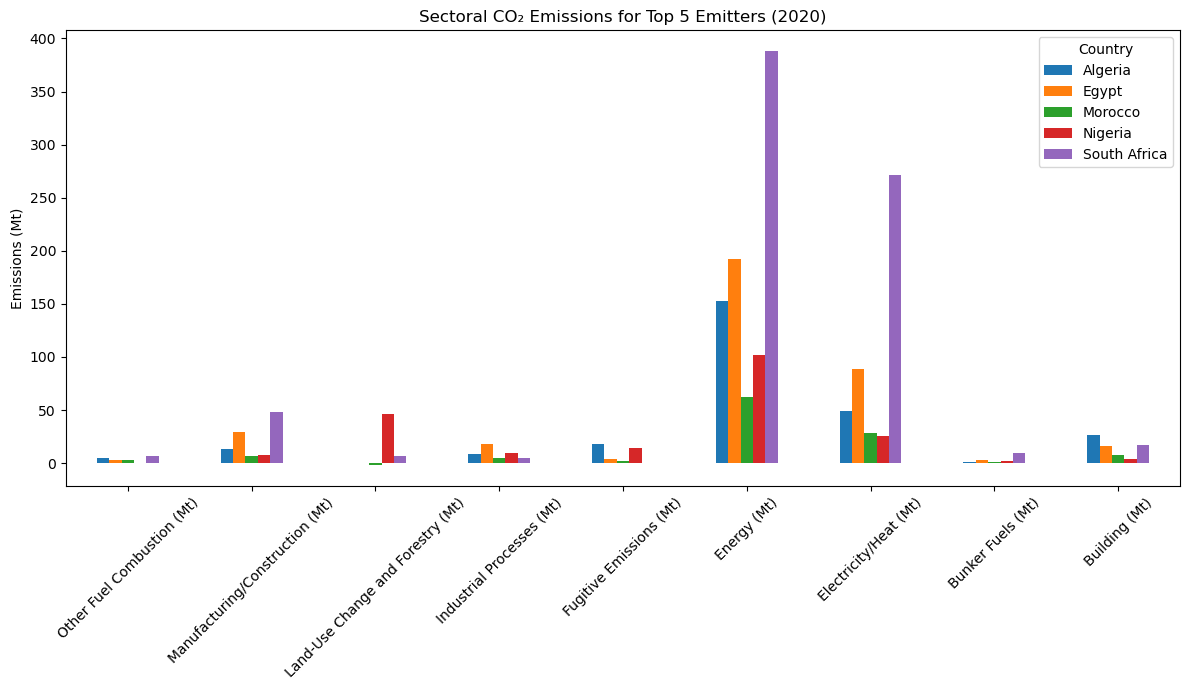

In [43]:
top_emitters = df.groupby('Country')['Total CO2 Emission excluding LUCF (Mt)'].sum().sort_values(ascending=False).head(5).index

df_top = df[df['Country'].isin(top_emitters) & (df['Year'] == 2020)]

df_sector = df_top[['Country'] + sectors].set_index('Country')

df_sector.T.plot(kind='bar', figsize=(12, 7))
plt.title('Sectoral CO₂ Emissions for Top 5 Emitters (2020)')
plt.ylabel('Emissions (Mt)')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


Through this graph we note that sectoral emissions vary greatly across African countries. South Africa dominates energy-related emissions, while Nigeria's profile is shaped by land-use change. These patterns show the need for tailored climate action: clean energy for high emitters like South Africa and land management policies for countries like Nigeria.

## Store & Model - SQLite Database

In [50]:
#Importing Libraries
import sqlite3
import pandas as pd

In [51]:
# Creating the SQLite Database
conn = sqlite3.connect("emissions.db")
cursor = conn.cursor()

In [52]:
# Creating our countries table 
cursor.execute('''
CREATE TABLE IF NOT EXISTS countries (
    country_id INTEGER PRIMARY KEY AUTOINCREMENT,
    country_name TEXT,
    country_code TEXT,
    sub_region TEXT
);
''')

In [54]:
# Creating our years table 
cursor.execute('''
CREATE TABLE IF NOT EXISTS years (
    year_id INTEGER PRIMARY KEY AUTOINCREMENT,
    year INTEGER UNIQUE
);
''')

In [57]:
# Creating our emissions table 
cursor.execute('''
CREATE TABLE IF NOT EXISTS emissions (
    emission_id INTEGER PRIMARY KEY AUTOINCREMENT,
    country_id INTEGER,
    year_id INTEGER,
    total_co2_incl_lucf REAL,
    total_co2_excl_lucf REAL,
    population INTEGER,
    gdp_per_capita REAL,
    emissions_per_capita REAL,
    electricity_heat REAL,
    manufacturing_construction REAL,
    land_use_change REAL,
    FOREIGN KEY (country_id) REFERENCES countries(country_id),
    FOREIGN KEY (year_id) REFERENCES years(year_id)
);
''')

conn.commit()

In [58]:
# Inserting Data from a Pandas Dataframe

# Inserting unique countries
countries = df_cleaned[['Country', 'Code', 'Sub-Region']].drop_duplicates()

for _, row in countries.iterrows():
    cursor.execute('''
    INSERT INTO countries (country_name, country_code, sub_region)
    VALUES (?, ?, ?)''', (row['Country'], row['Code'], row['Sub-Region']))

# Inserting unique years
years = df_cleaned['Year'].unique()

for y in years:
    cursor.execute('''
    INSERT INTO years (year)
    VALUES (?)''', (int(y),))

conn.commit()


In [60]:
# Inserting the emission records

for _, row in df_cleaned.iterrows():
    # Get country_id and year_id
    cursor.execute("SELECT country_id FROM countries WHERE country_name = ?", (row['Country'],))
    country_id = cursor.fetchone()[0]

    cursor.execute("SELECT year_id FROM years WHERE year = ?", (int(row['Year']),))
    year_id = cursor.fetchone()[0]

    cursor.execute('''
    INSERT INTO emissions (
        country_id, year_id, total_co2_incl_lucf, total_co2_excl_lucf,
        population, gdp_per_capita, emissions_per_capita,
        electricity_heat, manufacturing_construction, land_use_change
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        country_id, year_id,
        row.get('Total CO2 Emission including LUCF (Mt)', None),
        row.get('Total CO2 Emission excluding LUCF (Mt)', None),
        row.get('Population', None),
        row.get('GDP PER CAPITA (USD)', None),
        row.get('Emissions Per Capita', None),
        row.get('Electricity/Heat', None),
        row.get('Manufacturing/Construction', None),
        row.get('Land-Use Change and Forestry', None)
    ))

conn.commit()


In [61]:
# Querying my database
query = '''
SELECT year, SUM(total_co2_incl_lucf) as total_emissions
FROM emissions
JOIN years ON emissions.year_id = years.year_id
GROUP BY year
ORDER BY year
'''

df_query = pd.read_sql_query(query, conn)
df_query.head()


,year,total_emissions
0,2000,1754.07
1,2001,1847.02
2,2002,1858.30
3,2003,1902.26
4,2004,1952.09


In [63]:
# Double-checking my database
pd.read_sql_query('''
SELECT year, country_name, total_co2_incl_lucf
FROM emissions
JOIN countries ON emissions.country_id = countries.country_id
JOIN years ON emissions.year_id = years.year_id
ORDER BY year LIMIT 10
''', conn)


,year,country_name,total_co2_incl_lucf
0,2000,Algeria,80.62
1,2000,Angola,26.40
2,2000,Benin,16.42
3,2000,Botswana,45.10
4,2000,Burkina Faso,13.31
5,2000,Burundi,5.47
6,2000,Cameroon,57.69
7,2000,Cabo Verde,-0.20
8,2000,Central African Republic,14.19
9,2000,Chad,8.13


In [62]:
# Exporting SQL file for submission
with open("emissions_schema.sql", "w") as f:
    for line in conn.iterdump():
        f.write('%s\n' % line)


#### NOTE:
To support structured storage and querying, we created a relational database in SQLite with three tables: `countries`, `years`, and `emissions`. The database was populated directly from the cleaned dataset using Python. This design supports flexible querying, such as finding emissions by country or sector over time. The full schema and SQL file are included in the submission.


## Actionable Insights and Recommendations

***Insights***
- Only a few countries in Africa have disproportionately high per person emissions, while most have very low carbon footprints
- Total CO₂ emissions increased steadily from 2000 to 2019, with a slight drop in 2020 (likely due to COVID-19).
- South Africa is the dominant emitter amongst the countries and consistently the top contributor in energy, electricity,    manufacturing, and industrial emissions.
- While most African countries emit relatively little CO₂ per person, Southern African countries stand out with significantly higher emissions
- There isn’t a strong link between GDP and emissions per person, suggesting that wealth does not always lead to higher carbon impact meaning other factors play a bigger role.
- Africa's emissions are largely driven by energy use, land use change, and electricity generation.
- South Africa dominates energy-related emissions, while Nigeria's profile is shaped by land-use change


***Recommendations***
- Prioritize national-level emissions reduction programs in South Africa and Nigeria since they are responsible for a large share of emissions, targeting them will yield the greatest impact.
- South Africa and its region have disproportionately high per capita emissions, especially in energy and electricity sectors therefore invest in solar, wind, and hydroelectric infrastructure.
- Since land use change is a major contributor in Nigeria and likely across forested regions we should implement reforestation, agroforestry, and land zoning policies.
- We should support countries in building national emission inventories and invest in satellite monitoring and open-data platforms for tracking deforestation and emissions hotspots because reliable data is crucial for tracking changes

## Ethics, Data Quality, and Transparency

This project considered data ethics at each stage of the analysis. During cleaning, we noted that some entries were missing or potentially inconsistent — especially around land-use emissions, which are difficult to measure. We addressed this where possible but acknowledge that limitations remain.

To promote fairness, we compared both total and per capita emissions. This avoids unfairly penalizing large-population countries and highlights hidden high-emitters. We avoided assuming that wealth equals pollution by analyzing GDP relationships rather than stating them as facts.
